# Machine Learning: Detección de Fraude en Tarjetas de Crédito
Este proyecto aborda el problema de detección de transacciones fraudulentas en tarjetas de crédito, utilizando modelos de Machine Learning y técnicas de balanceo de clases. 
Se emplean métodos de detección de anomalías y estrategias de muestreo para mejorar la identificación de fraudes en un conjunto de datos altamente desbalanceado.


## Análisis y evaluación del Dataset
<hr>

#### 1. Importar Bibliotecas

In [27]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
warnings.filterwarnings("ignore", category=RuntimeWarning)

#### 2. Cargar y analizar el dataset

In [2]:
# Cargar los datos
df = pd.read_csv('creditcard.csv')
df.dropna(inplace=True)
df.drop(['Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 3. Análisis de las clases

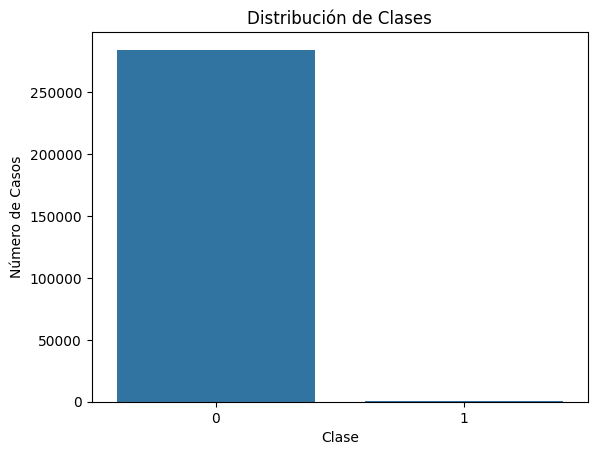

In [4]:
fraud_cases = df['Class'].value_counts()
sns.barplot(x=fraud_cases.index, y=fraud_cases.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Número de Casos')
plt.show()

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

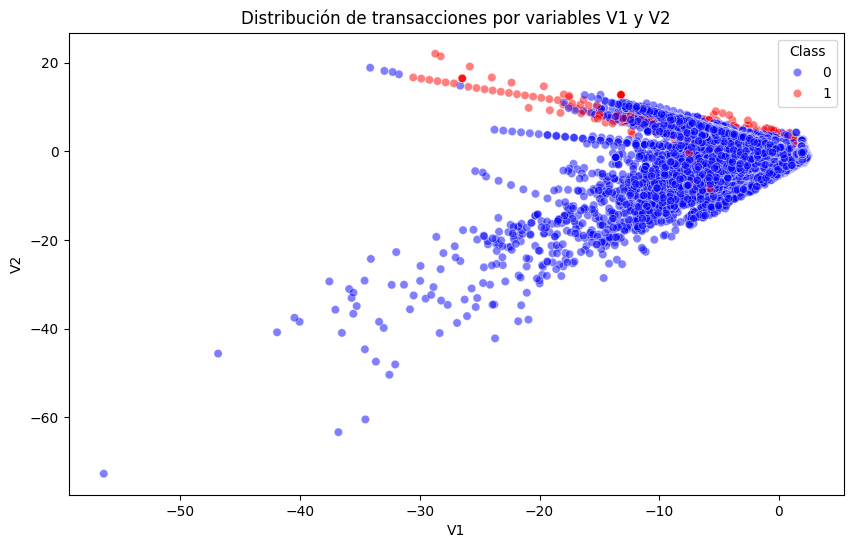

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["V1"], y=df["V2"], hue=df["Class"], alpha=0.5, palette={0: "blue", 1: "red"})
plt.title("Distribución de transacciones por variables V1 y V2")
plt.show()

**Dataset desbalanceado:**
* Clase 0 (No Fraude): 284315 transacciones
* Clase 1 (Fraude): 492 transacciones


#### 4. Preprocesamiento de Datos

In [6]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], train_size=0.7, random_state=42)
# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5. Modelo de Regresión Logística

In [7]:
# Entrenar modelo base
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
# Evaluación
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9992626663389628
Recall: 0.625
Precision: 0.8762886597938144
F1-score: 0.7296137339055794


#### 6. Matriz de Confusión

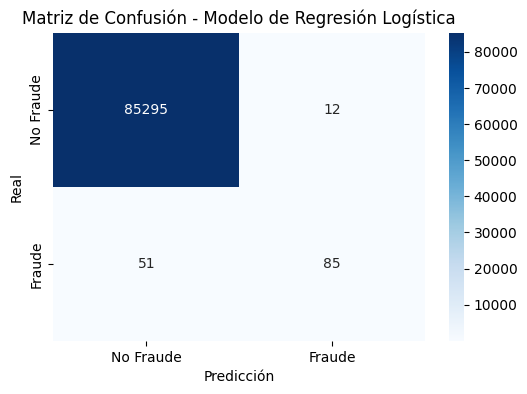

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Modelo de Regresión Logística")
plt.show()

* 85295 TN (True Negatives) → **85295 transacciones normales detectadas** correctamente.
* 12 FP (False Positives) → **12 transacciones normales** clasificadas como fraude.
* 51 FN (False Negatives) → **51 fraudes no detectados** (el modelo falló en ellos).
* 85 TP (True Positives) → **85 fraudes detectados** correctamente.

#### **Evaluación de las métricas**
* **Specificity (Especificidad) = 0.99986 (~99.99%)**: Detecta perfectamente los casos normales.
* **F1-score = 0.729 (~72.96%)**: Un balance entre precisión y recall, el valor no es malo, pero tampoco ideal.
* **Accuracy (Exactitud) = 0.99926 (~99.93%)** Métrica engañosa porque el dataset está desbalanceado, la **alta exactitud no significa que detecte bien los fraudes**.
* **Recall (Sensibilidad) = 0.625 (~62.5%):** De cada 100 fraudes reales, detecta 62 y deja escapar 38.**Queremos maximizar el Recall.**
* **Precision (Precisión) = 0.876 (~87.6%)** : Cuando el modelo predice "Fraude", acierta el 87.6% de las veces.

## Métodos de Detección de Anomalías
<hr>

### **Determinante de Covarianza Mínima**

En esta etapa, evaluaremos cuál es el mejor nivel de contaminación para maximizar el Recall, asegurando que el modelo detecte la mayor cantidad posible de fraudes sin generar demasiados falsos positivos.

#### 1. Predicción

In [9]:
# Lista para almacenar las métricas de cada iteración
results = []

# Iterar sobre diferentes niveles de contaminación
for c in np.arange(0.01, 0.3, 0.01):
    # Aplicar el modelo EllipticEnvelope con la contaminación actual
    mcd = EllipticEnvelope(contamination=c, random_state=42)
    mcd.fit(X_train_scaled)

    # Detectar outliers y filtrar los datos
    y_pred_elli = mcd.predict(X_train_scaled)
    mask = y_pred_elli != -1  # Filtrar solo los datos no considerados outliers
    X_train_elli, y_train_elli = X_train_scaled[mask], y_train[mask]

    # Entrenar el modelo de Regresión Logística
    model_mcd = LogisticRegression()
    model_mcd.fit(X_train_elli, y_train_elli)

    # Predecir en el conjunto de prueba
    y_pred_mcd = model_mcd.predict(X_test_scaled)

    # Calcular métricas
    metrics = {
        "Contaminación": c,
        "Accuracy": accuracy_score(y_test, y_pred_mcd),
        "Recall": recall_score(y_test, y_pred_mcd),
        "Precision": precision_score(y_test, y_pred_mcd),
        "Specificity": recall_score(y_test, y_pred_mcd, pos_label=0),  # Negativos predichos correctamente
        "F1-score": f1_score(y_test, y_pred_mcd)
    }

    results.append(metrics)

In [10]:
#@title 2.Mostrar Dataframe con  Métricas para cada tipo de Contaminación
from IPython.display import display

# Convertir a DataFrame
metrics_df = pd.DataFrame(results)

# Mostrar la tabla en el notebook
display(metrics_df)

,Contaminación,Accuracy,Recall,Precision,Specificity,F1-score
0,0.01,0.999368,0.808824,0.797101,0.999672,0.802920
1,0.02,0.998818,0.816176,0.593583,0.999109,0.687307
2,0.03,0.997507,0.808824,0.370370,0.997808,0.508083
3,0.04,0.995833,0.691176,0.230392,0.996319,0.345588
4,0.05,0.994862,0.573529,0.169935,0.995534,0.262185
5,0.06,0.994160,0.213235,0.068884,0.995405,0.104129
6,0.07,0.994125,0.198529,0.064286,0.995393,0.097122
7,0.08,0.993949,0.213235,0.066059,0.995194,0.100870
8,0.09,0.993984,0.191176,0.060465,0.995264,0.091873
9,0.10,0.994043,0.227941,0.071264,0.995264,0.108581


* **C = Contamination**: Cuántos datos sospechosos descartamos.
* **Samples Used:** Cuántos datos quedan después de descartar los outliers.
* **Accuracy (Exactitud):** Cuántas predicciones hicimos bien en total.
* **Recall (Sensibilidad):** De todos los fraudes reales, ¿cuántos detectamos?
* **Precision (Precisión):** De todas las transacciones que dijimos que eran fraudes, ¿cuántas realmente eran fraudes?
* **Specificity:** De todas las transacciones normales, ¿cuántas detectamos correctamente?
* **F1-score:** Un balance entre precisión y recall (si es alto, el modelo es bueno detectando fraudes).

#### 2. Encontrar el mejor F1-score

In [11]:
best_row = metrics_df.loc[metrics_df["F1-score"].idxmax()]
best_c = best_row["Contaminación"] #mejor contaminación

print(f"Mejor contaminación para Determinante de Covarianza: {best_c:.2f}")

Mejor contaminación para Determinante de Covarianza: 0.01


#### 3. Entrenar nuevamente con la mejor contaminación seleccionada

In [12]:
best_mcd = EllipticEnvelope(contamination=best_c, random_state=42)
best_mcd.fit(X_train_scaled)

y_pred_best = best_mcd.predict(X_train_scaled)
mask_best = y_pred_best != -1  # Filtrar datos sin outliers
X_train_best, y_train_best = X_train_scaled[mask_best], y_train[mask_best]

# Entrenar el mejor modelo de Regresión Logística
best_model_mcd = LogisticRegression()
best_model_mcd.fit(X_train_best, y_train_best)

# Predecir en el conjunto de prueba
y_pred_best_mcd = best_model_mcd.predict(X_test_scaled)

#### 4. Matriz de Confusión: MCD

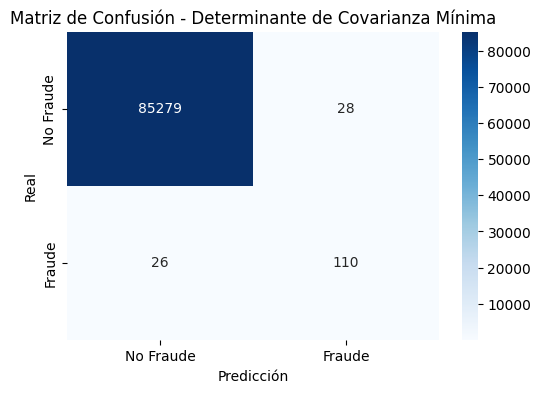

In [13]:
best_conf_matrix = confusion_matrix(y_test, y_pred_best_mcd)

# Crear el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Determinante de Covarianza Mínima")
plt.show()

#### 5. Métricas de Evaluación: MCD

In [14]:
print("Accuracy: ", accuracy_score(y_test, y_pred_best_mcd))
print("Recall: ", recall_score(y_test, y_pred_best_mcd))
print("precision_score: ", precision_score(y_test, y_pred_best_mcd))
print("Especificidad: ", recall_score(y_test, y_pred_best_mcd, pos_label=0)) # Negativos predichos correctamente
print("F1-score: ", f1_score(y_test, y_pred_best_mcd))

Accuracy:  0.9993679997191109
Recall:  0.8088235294117647
precision_score:  0.7971014492753623
Especificidad:  0.9996717737114188
F1-score:  0.8029197080291971


**ANÁLISIS:**

* **Accuracy:** (de 99.92% a 99.93%), en optimas condiciones
* **Recall mejoró:** (de 62.5% a 80.88%), lo que significa que el **modelo detecta muchos más fraudes.**
* **F1-score aumentó** de 72.9% a 80.58%, lo que indica un mejor balance entre precisión y recall.
* **La precision bajó** ligeramente (87.6% → 80.3%), lo que significa que el modelo está detectando más fraudes, pero con más falsos positivos.
* **La especificidad bajó un poco**, pero sigue siendo casi perfecta (~99.97%).


### **Isolation Forest**

Isolation Forest es un método de detección de anomalías basado en árboles de decisión. A diferencia de los enfoques tradicionales, no modela la distribución de los datos, sino que busca identificar observaciones anómalas basándose en su facilidad para ser aisladas en un espacio multidimensional.

En esta etapa, aplicamos Isolation Forest para identificar transacciones fraudulentas como outliers y evaluar su desempeño en comparación con otros enfoques.

#### 1. Predicción

In [19]:
best_iforest = IsolationForest(contamination=0.01, random_state=42)
best_iforest.fit(X_train_scaled)

y_pred_best_iforest = best_iforest.predict(X_train_scaled)
mask_best_iforest = y_pred_best_iforest == 1  # Filtrar datos sin outliers
X_train_best_iforest, y_train_best_iforest = X_train_scaled[mask_best_iforest], y_train[mask_best_iforest]

# Entrenar modelo de Regresión Logística
best_model_iforest = LogisticRegression()
best_model_iforest.fit(X_train_best_iforest, y_train_best_iforest)

# Predecir en el conjunto de prueba
y_pred_best_iforest_test = best_model_iforest.predict(X_test_scaled)

#### 2. Matriz de Confusión

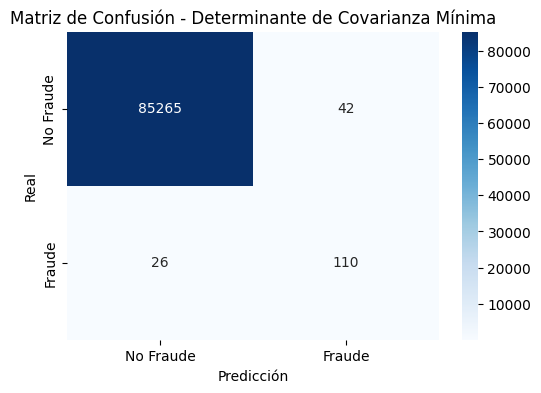

In [20]:
best_conf_matrix_iforest = confusion_matrix(y_test, y_pred_best_iforest_test)

# Crear el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(best_conf_matrix_iforest, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Determinante de Covarianza Mínima")
plt.show()

#### 3. Métricas de Evaluación: Isolation Forest

In [21]:
print("Accuracy: ", accuracy_score(y_test, y_pred_best_iforest_test))
print("Recall: ", recall_score(y_test, y_pred_best_iforest_test))
print("precision_score: ", precision_score(y_test, y_pred_best_iforest_test))
print("Especificidad: ", recall_score(y_test, y_pred_best_iforest_test, pos_label=0)) # Negativos predichos correctamente
print("F1-score: ", f1_score(y_test, y_pred_best_iforest_test))

Accuracy:  0.999204147794436
Recall:  0.8088235294117647
precision_score:  0.7236842105263158
Especificidad:  0.9995076605671281
F1-score:  0.7638888888888888


**ANÁLISIS**

* El **Recall se mantiene (80.88%)**, igual que con MCD.
* Se detectan más fraudes, pero se generan más falsos positivos (baja precisión).
* **La precisión bajó más** que con MCD: 80.3% → 72.3% . Ahora casi el 30% de los fraudes detectados son errores.
* El **F1-score bajó** un poco (80.5% → 76.3%).
* **Isolation Forest es útil, pero genera demasiados falsos positivos.**
* **El modelo con MCD sigue siendo mejor** (balance entre Recall y Precisión).


## Estrategias de Balanceo de Clases
<hr>

### **Cost-Sensitive Training**

Modelo supervisado con penalización por desbalance. En modelos desbalanceados, el aprendizaje tiende a favorecer la clase mayoritaria. Cost-Sensitive Training ajusta los pesos de cada clase para que el modelo penalice más los errores en la clase minoritaria (fraudes). Esto permite mejorar el recall sin necesidad de modificar la distribución de los datos.

#### 1. Predicción

In [22]:
# Entrenar el modelo de Regresión Logística con penalización por desbalance
cost_sensitive_model = LogisticRegression(class_weight="balanced", random_state=42)
cost_sensitive_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_cost_sensitive = cost_sensitive_model.predict(X_test_scaled)

#### 2. Matriz de Confusión

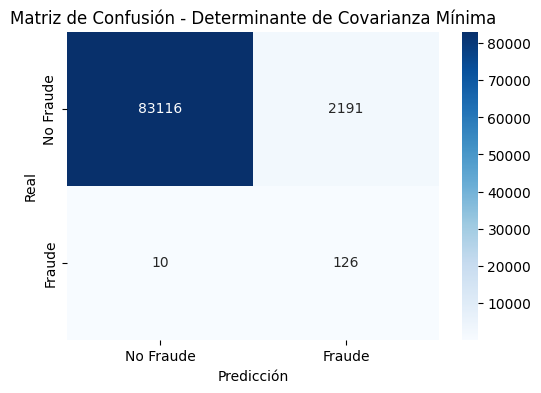

In [23]:
conf_matrix_cost_sensitive = confusion_matrix(y_test, y_pred_cost_sensitive)

# Crear el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_cost_sensitive, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Determinante de Covarianza Mínima")
plt.show()

#### 3. Métricas de : Cost-Sensitive Training

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred_cost_sensitive))
print("Recall:", recall_score(y_test, y_pred_cost_sensitive))
print("Precision:", precision_score(y_test, y_pred_cost_sensitive))
print("Specificity:", recall_score(y_test, y_pred_cost_sensitive, pos_label=0))
print("F1-score:", f1_score(y_test, y_pred_cost_sensitive))

Accuracy: 0.97424013669932
Recall: 0.9264705882352942
Precision: 0.054380664652567974
Specificity: 0.9743162929185178
F1-score: 0.10273134936812067


**ANÁLISIS**
* Detecta muchos fraudes (**alto Recall**), pero genera **demasiados falsos positivos.**
* Baja precisión significa que muchas transacciones legítimas son clasificadas como fraude.

### **Undersampling**

#### 1. Predicción

In [32]:
#!pip install imbalanced-learn

In [33]:
# Aplicar Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)

# Entrenar modelo
model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)

# Predecir
y_pred_under = model_under.predict(X_test_scaled)

#### 2. Matriz de Confusión

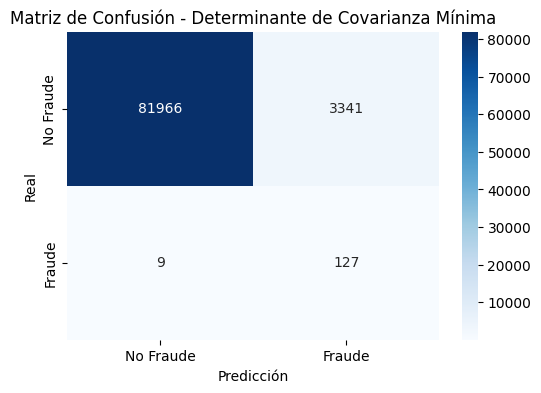

In [37]:
conf_matrix_under = confusion_matrix(y_test, y_pred_under)

# Crear el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_under, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Determinante de Covarianza Mínima")
plt.show()

#### 3. Métricas de : Undersampling

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred_under))
print("Recall:", recall_score(y_test, y_pred_under))
print("Precision:", precision_score(y_test, y_pred_under))
print("Specificity:", recall_score(y_test, y_pred_under, pos_label=0))
print("F1-score:", f1_score(y_test, y_pred_under))

Accuracy: 0.9607925751670704
Recall: 0.9338235294117647
Precision: 0.036620530565167245
Specificity: 0.9608355703517882
F1-score: 0.07047724750277469


**ANÁLISIS**:
* **Aumenta el Recall a 93.3%**, pero con una **precisión muy baja.**
* Muchos falsos positivos, lo que no es ideal en un sistema de detección de fraudes.

### **OverSampling**

#### 1. Predicción

In [39]:
from imblearn.over_sampling import RandomOverSampler

# Aplicar Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train_scaled, y_train)

# Entrenar modelo
model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)

# Predecir
y_pred_over = model_over.predict(X_test_scaled)

#### 2. Matriz de Confusión

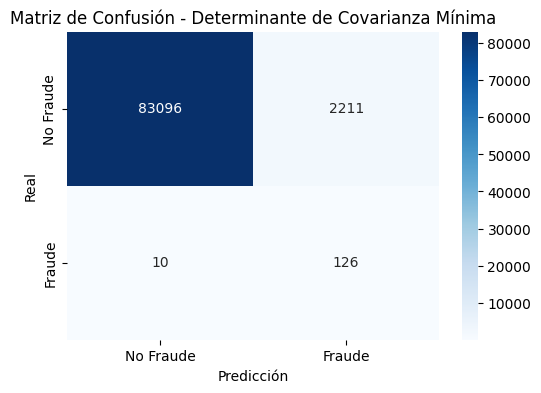

In [40]:
conf_matrix_over = confusion_matrix(y_test, y_pred_over)

# Crear el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_over, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Determinante de Covarianza Mínima")
plt.show()

#### 3. Métricas de : Oversampling

In [41]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test,y_pred_over))
print("Recall:", recall_score(y_test, y_pred_over))
print("Precision:", precision_score(y_test, y_pred_over))
print("Specificity:", recall_score(y_test, y_pred_over, pos_label=0))
print("F1-score:", f1_score(y_test, y_pred_over))

Accuracy: 0.974006062521213
Recall: 0.9264705882352942
Precision: 0.05391527599486521
Specificity: 0.9740818455695313
F1-score: 0.101900525677315


**ANÁLISIS:**
* Resultados similares a Cost-Sensitive Training.
* Se detectan muchos fraudes, pero con muchos falsos positivos.

### **SMOTE:**

#### 1. Predicción

In [42]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Entrenar modelo
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

# Predecir
y_pred_smote = model_smote.predict(X_test_scaled)


#### 2. Matriz de Confusión

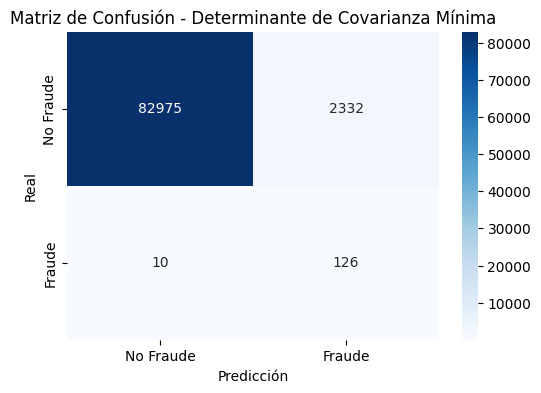

In [43]:
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Crear el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Determinante de Covarianza Mínima")
plt.show()

#### 3. Métricas de : Smote

In [44]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test,y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Specificity:", recall_score(y_test, y_pred_smote, pos_label=0))
print("F1-score:", f1_score(y_test, y_pred_smote))


Accuracy: 0.9725899137436653
Recall: 0.9264705882352942
Precision: 0.05126118795768918
Specificity: 0.9726634391081623
F1-score: 0.09714726291441789


**ANÁLISIS:**
* Mejor que Undersampling, pero peor que Oversampling en términos de precisión.
* Aumenta la detección de fraudes, pero con muchos falsos positivos.

**CONCLUSIÓN**

* **MCD** fue la mejor técnica con **Recall del 80.88%** y un buen equilibrio entre Recall y Precisión.
* **Isolation Forest** también fue útil, pero con **más falsos positivos**.